Wczytaj poniższe dane "Street View House Number"

In [2]:
from torchvision import transforms
from torchvision import datasets
import torch

transform = transforms.Compose([#transformacja pozwalająca zamienić oryginalny format fdanych PIL Image na pyTorchowy Tensor
    transforms.ToTensor()
])

svhn_data_train=datasets.SVHN("svhn", split='train', transform=transform, target_transform=None, download=True)
svhn_data_test=datasets.SVHN("svhn", split='test', transform=transform, target_transform=None, download=True)



data_loader_train = torch.utils.data.DataLoader(svhn_data_train,
                                          batch_size=16,
                                          shuffle=True,
                                          )


data_loader_test = torch.utils.data.DataLoader(svhn_data_test,
                                          batch_size=16,
                                          shuffle=False,
                                          )

Data batch dimensions: torch.Size([16, 3, 32, 32])
Label dimensions: torch.Size([16])
tensor([5, 1, 1, 3, 6, 3, 2, 1, 6, 4, 4, 2, 8, 4, 4, 5])


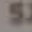

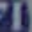

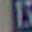

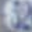

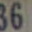

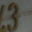

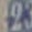

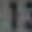

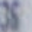

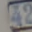

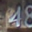

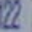

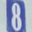

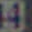

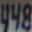

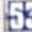

In [3]:
%matplotlib inline

from torchvision.transforms import ToPILImage
from IPython.display import Image
to_img = ToPILImage()

# Checking the dataset
for images, labels in data_loader_train: 
    print('Data batch dimensions:', images.shape)
    print('Label dimensions:', labels.shape)
    break
print(labels)
for i in images:
  display(to_img(i))

In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3072, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


model = Net()
model = model.to("cuda")

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [53]:
train_losses = []

for epoch in range(10):  # loop over the dataset multiple times
    train_total = 0
    train_correct = 0
    running_loss = 0.0
    for i, data in enumerate(data_loader_train, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to("cuda")
        labels = labels.to("cuda")

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # accuracy
        scores, predictions = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += int(sum(predictions == labels))

        # append loss
        running_loss += loss.item()
        train_losses.append(round(loss.item(), 3))
        max_i = i+1

    print('epoch: %d loss: %.3f accuracy: %.2f' %
          (epoch + 1, running_loss / max_i, train_correct / train_total))
    

print('Finished Training')


epoch: 1 loss: 2.231 accuracy: 0.19
epoch: 2 loss: 1.954 accuracy: 0.30
epoch: 3 loss: 1.507 accuracy: 0.49
epoch: 4 loss: 1.245 accuracy: 0.59
epoch: 5 loss: 1.103 accuracy: 0.65
epoch: 6 loss: 0.998 accuracy: 0.68
epoch: 7 loss: 0.911 accuracy: 0.72
epoch: 8 loss: 0.850 accuracy: 0.73
epoch: 9 loss: 0.796 accuracy: 0.75
epoch: 10 loss: 0.750 accuracy: 0.76
Finished Training


W przypadku poniższego wykresu postanowiłem uśrednić co 100 wartość funkcji kosztu, aby wykres nabral bardziej kształtu linii, a nie porozrzucane punkty po wykresie. Jest to wykres ukazujący zależność wielkości funkcji straty od ilości iteracji algorytmu.

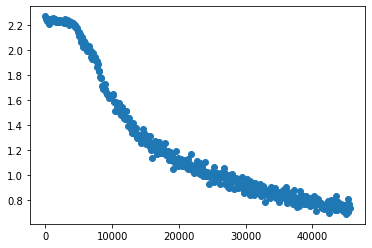

In [90]:
import matplotlib.pyplot as plt

losses_100 = []

for i in range(0, 457):
  k = (i+1)*100
  j = i*100
  losses_100.append(sum(train_losses[j:k])/len(train_losses[j:k]))

plt.scatter(range(1, (len(losses_100))*100, 100), losses_100)

In [55]:
test_correct = 0
test_total = 0
with torch.no_grad():
    for data in data_loader_test:
        inputs, labels = data

        inputs = inputs.to("cuda")
        labels = labels.to("cuda")

        outputs = model(inputs)
        scores, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

print('Test accuracy: %.2f' % (
    test_correct / test_total))

Test accuracy: 0.75
